In [2]:
#Importing important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#loading haberman.csv in to pandas dataframe
hm=pd.read_csv(r'D:\mayank\AAIC\Datasets\haberman.csv')
hm.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
#this is gives little overview of data about the no. of columns and rows. Also we can see the data from top and end.
hm.tail()


,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
hm.shape
#dataset has 306 rows and 4 columns


(306, 4)

In [6]:
#get all statistical info about haberman dataset 
hm.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:
1. Age of patients varies from 30 to 83 years.
2. The data is taken from 1958 to 1969.
3. 25 percent patients have age between 44 and 30(both inclusive) years.
4. 50 percent patients have age between 52 and 30(both inclusive) years.
5. 75 percent patients have age between 60.75(60 years 9 months) and 30(both inclusive) years.
6. Number of nodes varies betrween 0 to 52, also 75% of patients have 0 to 4 number of nodes.
7. Mean of nodes is 4.026144 whereas median is 1, so there must be outliers.

In [37]:
hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observations:
1. Every column(age, year,nodes & status) has 306 entries.
2. None of the column has null entry.

In [7]:
#get counts of classes(1 and 2) in status which says the status of survival of patients 5 years after the treatment.
print(hm['status'].value_counts())
print(hm['status'].value_counts(normalize = True))


1    225
2     81
Name: status, dtype: int64
1    0.735294
2    0.264706
Name: status, dtype: float64


Observation:-
1. As there is ample difference(225 and 81) between two class variables so it's a imbalanced data. 
2. 225 patients survived up to 5 years or more
3. 81 died before 5 years

## 2-D Scatter plot

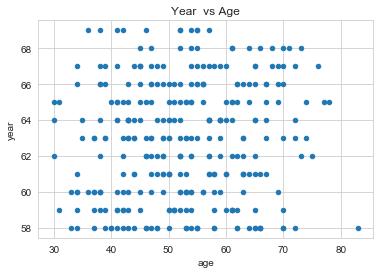

In [81]:
#2-D Scatter plot of year vs age

plt.close();
hm.plot(kind='scatter',x='age',y='year');
plt.title('Year  vs Age');
plt.show();

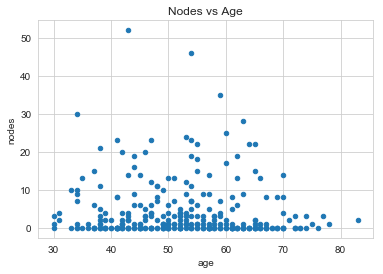

In [80]:
#2-D scatter plot of nodes vs age
plt.close();
hm.plot(kind='scatter',x='age',y='nodes');
plt.title('Nodes vs Age');
plt.show();

Observations:
1. Age varies from 30 to 83.
2. Year varies from 1958 to 1969
3. To get proper knolwdge about different class label we need to plot colored points.

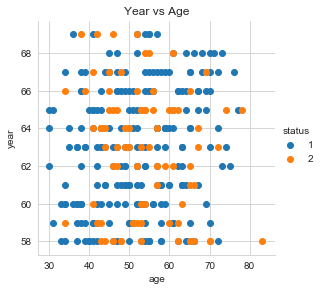

In [65]:
#2-D scater plot with color coding for each class label
plt.close();
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue='status', height=4) \
   .map(plt.scatter, 'age', 'year') \
   .add_legend();
plt.title('Year vs Age');
plt.show();

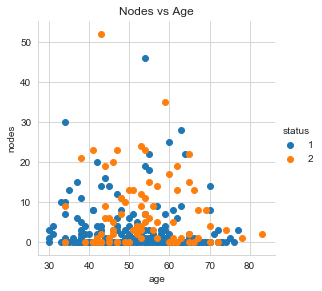

In [82]:
#2-D scatter plot with color coding of nodes vs age
plt.close();
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue='status',height=4) \
    .map(plt.scatter, 'age','nodes') \
    .add_legend();
plt.title('Nodes vs Age');
plt.show();

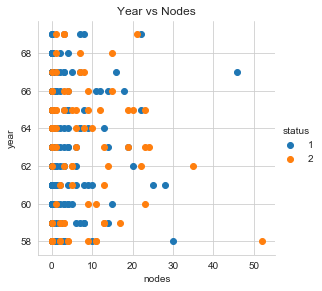

In [83]:
#2-D scatter plot with color coding of year vs nodes
plt.close();
sns.set_style('whitegrid')
sns.FacetGrid(hm,hue='status',height=4) \
    .map(plt.scatter, 'nodes','year') \
    .add_legend();
plt.title('Year vs Nodes')
plt.show();

Observations:
1. From above three 2-D scatter plots we can't separate different classes as in all plots there is good overlap.

### Pair Plots

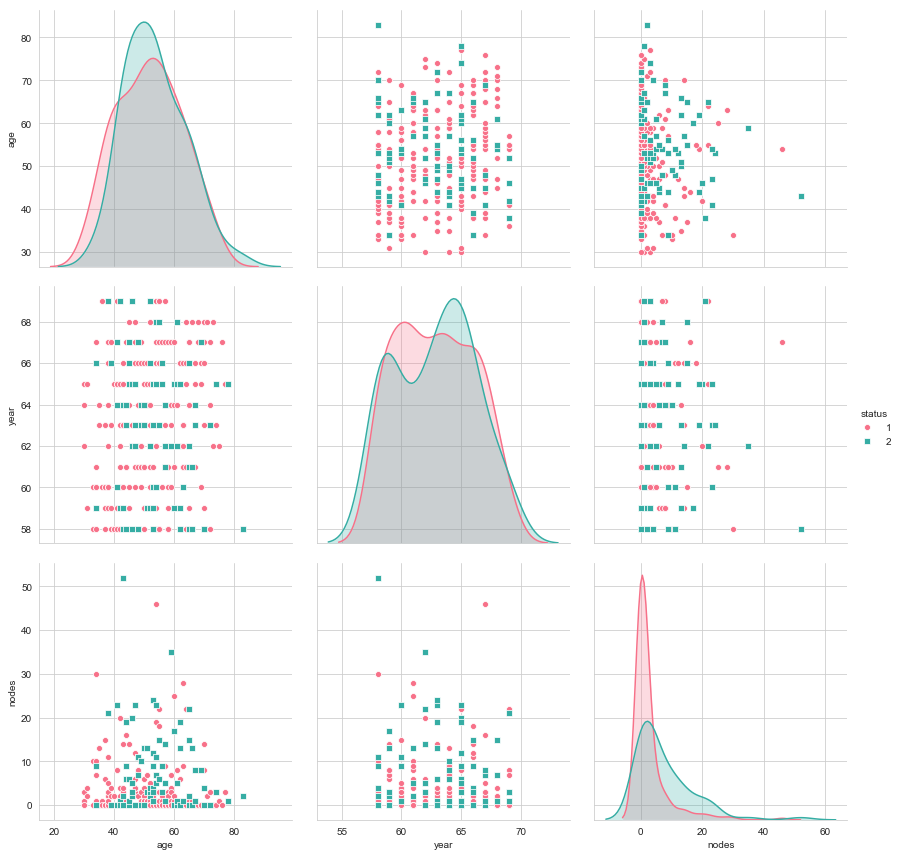

In [84]:
#Pair wise scatter plots using seaborn
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hm,hue='status',height=4, vars=['age','year','nodes'], markers =['o','s'],palette='husl');# ref link https://seaborn.pydata.org/generated/seaborn.pairplot.html
plt.show()

Observations:
1. From the above plot we can't say about the useful feature to discrimate between the class labels as there is much overlap.

## Univariate Analysis

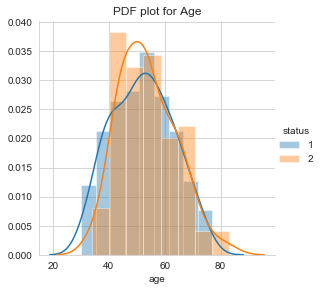

In [85]:
#univariate analysis of age
plt.close()
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue='status', height=4) \
   .map(sns.distplot, 'age') \
   .add_legend();
plt.title('PDF plot for Age')
plt.show();



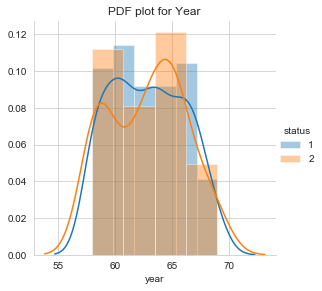

In [86]:
#univariate analysis of year
plt.close()
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue='status', height=4) \
   .map(sns.distplot, 'year') \
   .add_legend();
plt.title('PDF plot for Year')
plt.show();

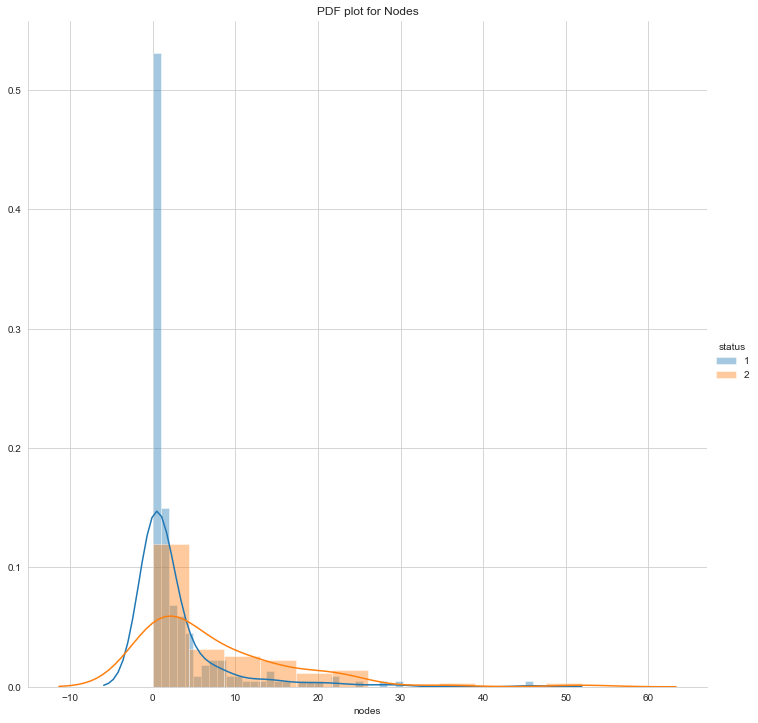

In [87]:
#we have kept height=10 her as the mostly values are less than 10 so that we can analyse it closely
plt.close()
sns.set_style('whitegrid')
sns.FacetGrid(hm, hue='status', height=10) \
   .map(sns.distplot, 'nodes') \
   .add_legend();
plt.title('PDF plot for Nodes')
plt.show();

Observations:
1. From the univariate analysis of age and year we can't say about the discrimination as there is much overlap.
2. From the univariate analysis above we can say that with status 1, the values of nodes is less than 2 in more than 60% cases. 

In [35]:
#creating a dataset from the hm dataset having status =1
hm_status_1=hm.loc[hm['status']==1]
hm_status_1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [36]:
#creating dataset hm_status_2 from dataset hm having status=2
hm_status_2=hm.loc[hm['status']==2]
hm_status_2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations:
1. 75% of status 1 have nodes<=3 and 50% of status 1 have 0 nodes but in status 2 75% of them have nodes<=11.
2. Minimum age in status 1 is 30 but in status 2 it is 34.
3. Maximum age in status 1 is 77 but in status 2 it is 83.

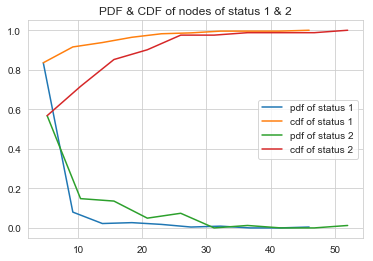

In [76]:
#plotting CDF and PDF for nodes of status 1 & 2
#tuple having arrays is formed in below line where we assign the arrays to counts and bins_edge
counts, bins_edge = np.histogram(hm_status_1['nodes'], bins=10, density = True)#bins shouldn't be too less or too large
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)#cumulative sum of pdf
plt.plot(bins_edge[1:],pdf,label='pdf of status 1')
plt.plot(bins_edge[1:], cdf,label='cdf of status 1');

counts, bins_edge = np.histogram(hm_status_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins_edge[1:],pdf,label='pdf of status 2')
plt.plot(bins_edge[1:], cdf,label='cdf of status 2');
plt.title('PDF & CDF of nodes of status 1 & 2')
plt.legend();#ref link https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
plt.grid(b=True)#ref link https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html
plt.show();

Observations:
1. 90% of status 1 have nodes<=10 and 70% of status 2 have nodes<=10.
2. More than 80% of status 1 have nodes<=4 and less than 58% of status 2 have nodes<=4.

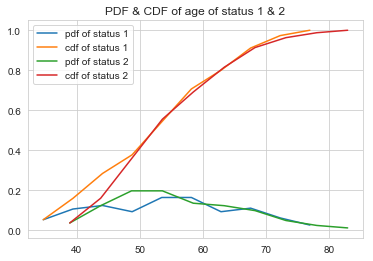

In [60]:
#CDF and PDF for age of status 1 and 2
counts, bins_edge = np.histogram(hm_status_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins_edge[1:],pdf,label='pdf of status 1')
plt.plot(bins_edge[1:], cdf,label='cdf of status 1');

counts, bins_edge = np.histogram(hm_status_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins_edge[1:],pdf,label='pdf of status 2')
plt.plot(bins_edge[1:], cdf,label='cdf of status 2');
# plt.grid(True)
plt.legend()
plt.title('PDF & CDF of age of status 1 & 2')
plt.show();


Observation: 
1. So much overlapping so it's not possible to classify using age.

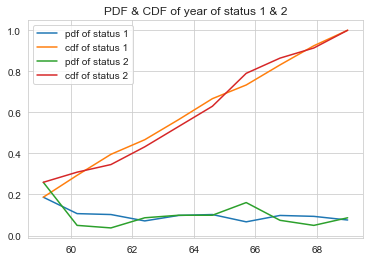

In [61]:
#CDF and PDF for age of status 1 and 2
counts, bins_edge = np.histogram(hm_status_1['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins_edge[1:],pdf,label='pdf of status 1')
plt.plot(bins_edge[1:], cdf,label='cdf of status 1');

counts, bins_edge = np.histogram(hm_status_2['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins_edge[1:],pdf,label='pdf of status 2')
plt.plot(bins_edge[1:], cdf,label='cdf of status 2');
plt.legend()
plt.title('PDF & CDF of year of status 1 & 2')

plt.show();

## Box Plots

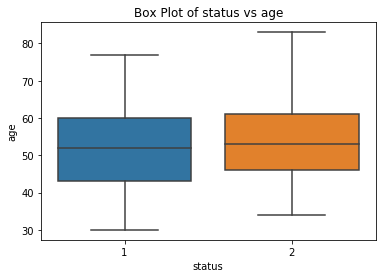

In [16]:
#box plot for age vs status
sns.boxplot(x="status",y="age",data=hm)
plt.title('Box Plot of status vs age')

plt.show()

Observations:
1. There are 75% of status 1  patients that have age<= 60.
2. No patient more than 77 age has status 1.
3. Patients more than age 77 have only status 2.

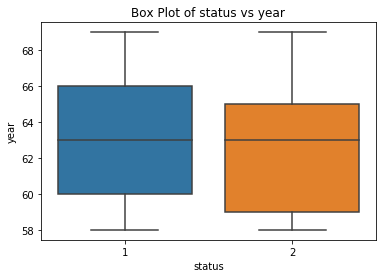

In [18]:
#box plot for year vs status
sns.boxplot(x="status",y="year",data=hm)
plt.title('Box Plot of status vs year')
plt.show()

Observations:
1. IQR of status 1 is from 1960 to 1966 ie. 50% status 1 is in that range.
2. And IQR for status 2 is 1959 to 1965.
3. Due to much overlap it's very difficult to classify.

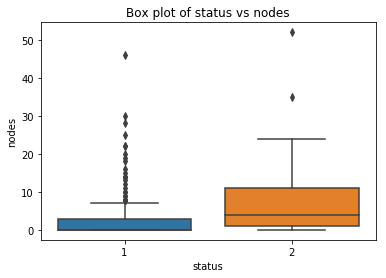

In [19]:
#box-plot for nodes vs status
sns.boxplot(x="status",y="nodes",data=hm)
plt.title('Box plot of status vs nodes')
plt.show()

Observations:
1. 75% of status 1 have nodes<=4.
2. 50% of status 2 have nodes<=4 and 75% have nodes<=12.


## Violin Plots

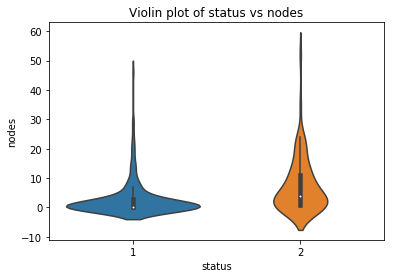

In [21]:
#violin plot for status vs nodes
sns.violinplot(x="status",y="nodes",data=hm)
plt.title('Violin plot of status vs nodes')
plt.show()

Observations:
1. In Status 1 the number of nodes<10 but in status 2 the values are also more than 10.


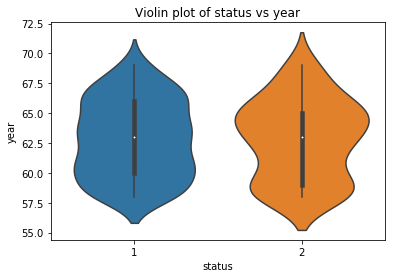

In [23]:
#violin plot for status vs year
sns.violinplot(x='status',y='year',data=hm)
plt.title('Violin plot of status vs year')
plt.show()

Observations:
1. There is much overlap so it's difficult to classify.
2. Near the year 65 there are more chances of getting status 2.

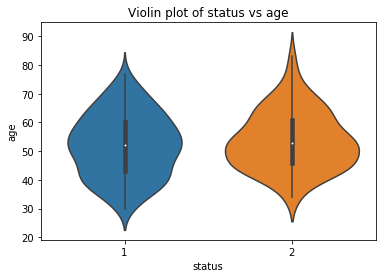

In [24]:
#violin plot for status vs age
sns.violinplot(x='status',y='age',data=hm)
plt.title('Violin plot of status vs age')
plt.show()

# Conclusions

1. Using all the dataset we plotted pair plots, distribution plot for univariate analysis, box plots and violin plots.
2. In all of the plots there was much overlapping so using these plots it was not possibe to classify the status.
3. Also the data is imbalanced as there are 225 datapoints with status 1 and 81 points with status 2.
4. Age<34 will have status 1 & Age>77 will have status 2.
